In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
csvpath1 = os.path.join("raw_data","clinicaltrial_data.csv")
csvpath2 = os.path.join("raw_data","mouse_drug_data.csv")

trial_df = pd.read_csv(csvpath1)
drug_df = pd.read_csv(csvpath2)

In [3]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
drug_df["Drug"].value_counts()
len(trial_df)

1893

In [6]:
#Merge tables to add Drug column
mice_df = trial_df.merge(drug_df, on="Mouse ID", how="outer")
mice_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


### Tumor Volume Over Time

In [22]:
#Group by Drug and Timepoint to get Mean and Std. Error
mice_drug_group = mice_df.groupby(["Drug","Timepoint"])
mice_drug_avg = mice_drug_group.mean().reset_index()
mice_drug_se = mice_drug_group.sem().reset_index()
mice_drug_avg.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [23]:
drug_list = list(set(mice_df["Drug"].values))
drug_list

['Propriva',
 'Capomulin',
 'Infubinol',
 'Stelasyn',
 'Ramicane',
 'Naftisol',
 'Ketapril',
 'Placebo',
 'Zoniferol',
 'Ceftamin']

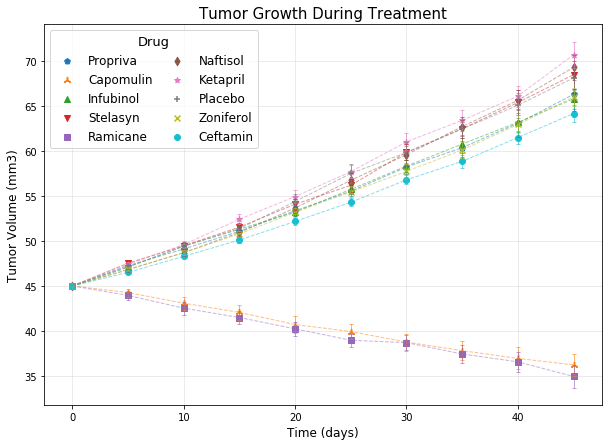

In [58]:
#Plot a line graph, scatter plot, and error bars for each drug
#Graph average tumor volume per timepoint
#Unique colors and markers per drug
plt.figure(figsize=[10,7])
markers=["o","x","+","*","d","s","v","^",(3,2,0),"p"]
for drug in drug_list:
    mice_drug_df = mice_drug_avg.loc[mice_drug_avg["Drug"]==drug]
    mice_drug_error = mice_drug_se.loc[mice_drug_avg["Drug"]==drug]
    plt.scatter(mice_drug_df["Timepoint"], mice_drug_df["Tumor Volume (mm3)"],label=drug,marker=markers.pop())
    a,=plt.plot(mice_drug_df["Timepoint"], mice_drug_df["Tumor Volume (mm3)"], ls="dashed",lw=1,alpha=0.5,label="")
    plt.errorbar(mice_drug_df["Timepoint"], mice_drug_df["Tumor Volume (mm3)"],
                 yerr=mice_drug_error["Tumor Volume (mm3)"],label=None,fmt=" ", elinewidth=1,alpha=0.6,
                capsize=2, ecolor=a.get_c())
    
plt.legend(loc="best",ncol=2,columnspacing=1,title="Drug",fontsize=12).get_title().set_fontsize(13)
plt.title("Tumor Growth During Treatment",fontsize=15)
plt.xlabel("Time (days)",fontsize=12)
plt.ylabel("Tumor Volume (mm3)",fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Metastatic Sites Over Time

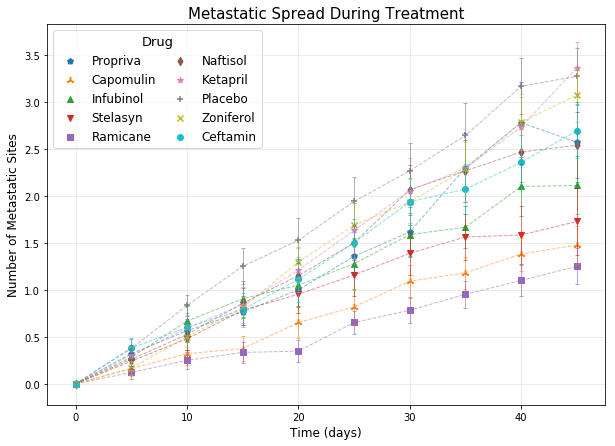

In [134]:
#Graph average Metstatic Sites per timepoint, same as above
plt.figure(figsize=[10,7])
markers=["o","x","+","*","d","s","v","^",(3,2,0),"p"]
for drug in drug_list:
    mice_drug_df = mice_drug_avg.loc[mice_drug_avg["Drug"]==drug]
    mice_drug_error = mice_drug_se.loc[mice_drug_avg["Drug"]==drug]
    plt.scatter(mice_drug_df["Timepoint"], mice_drug_df["Metastatic Sites"],label=drug,marker=markers.pop())
    a,=plt.plot(mice_drug_df["Timepoint"], mice_drug_df["Metastatic Sites"], ls="dashed",lw=1,alpha=0.5,label="")
    plt.errorbar(mice_drug_df["Timepoint"], mice_drug_df["Metastatic Sites"],
                 yerr=mice_drug_error["Metastatic Sites"],label=None,fmt=" ", elinewidth=1,alpha=0.6,
                capsize=2, ecolor=a.get_c())
    
plt.legend(loc="best",ncol=2,columnspacing=1,title="Drug",fontsize=12).get_title().set_fontsize(13)
plt.title("Metastatic Spread During Treatment",fontsize=15)
plt.xlabel("Time (days)",fontsize=12)
plt.ylabel("Number of Metastatic Sites",fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Survival Rates

In [63]:
mice_drug_count = mice_drug_group.count()["Mouse ID"].reset_index()
mice_drug_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


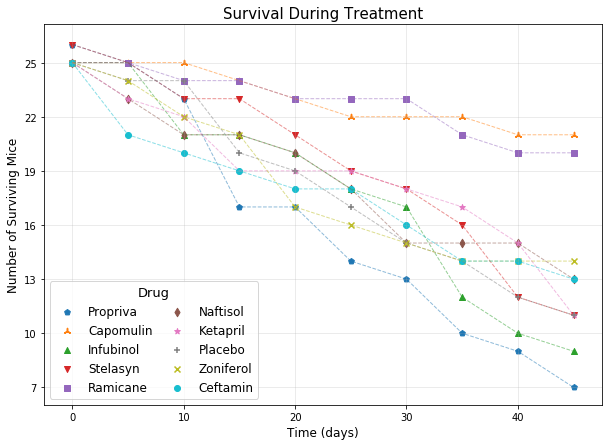

In [72]:
#Plot count of mice per timepoint, same as above without error bars
plt.figure(figsize=[10,7])
markers=["o","x","+","*","d","s","v","^",(3,2,0),"p"]
for drug in drug_list:
    mice_drug_df = mice_drug_count.loc[mice_drug_avg["Drug"]==drug]
    plt.scatter(mice_drug_df["Timepoint"], mice_drug_df["Mouse ID"],label=drug,marker=markers.pop())
    plt.plot(mice_drug_df["Timepoint"], mice_drug_df["Mouse ID"], ls="dashed",lw=1,alpha=0.5,label="")

    
plt.legend(loc="best",ncol=2,columnspacing=1,title="Drug",fontsize=12).get_title().set_fontsize(13)
plt.title("Survival During Treatment",fontsize=15)
plt.xlabel("Time (days)",fontsize=12)
plt.ylabel("Number of Surviving Mice",fontsize=12)
plt.grid(alpha=0.3)
plt.yticks(np.arange(7,26,3))
plt.show()

### Summary

In [88]:
#Calculate % Change in tumor (vol at 45 days/vol at 0 days)
changes = []
for drug in drug_list:
    mice_drug_df = mice_drug_avg.loc[mice_drug_avg["Drug"]==drug].reset_index()
    perc = (mice_drug_df["Tumor Volume (mm3)"][9]/mice_drug_df["Tumor Volume (mm3)"][0]-1)*100
    changes.append(perc)
x_axis = np.arange(len(changes))

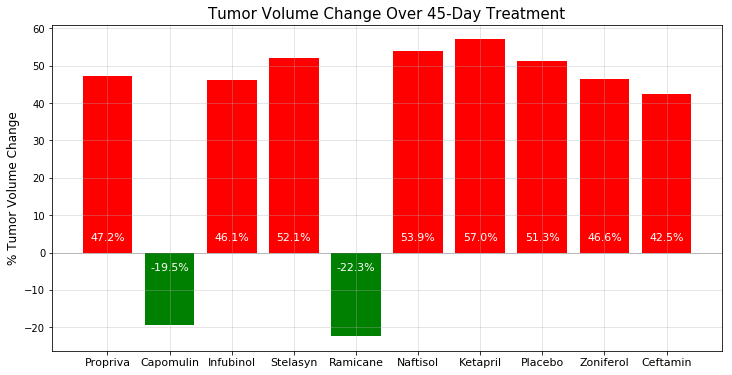

In [169]:
#Red or green based on + or - growth
def colorize(x):
    if x<0:
        return 'g'
    return 'r'

#Colors, value label positions, and values as percents
plt.figure(figsize=[12,6])
colors=[colorize(n) for n in changes]
valuepos=[n/abs(n)*4 for n in changes]
percs=['{:1.1f}%'.format(n) for n in changes]

#Bar graph, with value labels
plt.bar(x_axis,changes,color=colors,)
plt.xticks(x_axis, drug_list,fontsize=11)
plt.axhline(c="k",linewidth=1,alpha=0.2)
plt.grid(alpha=0.4)
for i in range(len(changes)):
    plt.text(i,valuepos[i],percs[i],color='white',horizontalalignment="center",verticalalignment="center",fontsize=11)

plt.title("Tumor Volume Change Over 45-Day Treatment", fontsize=15)
plt.ylabel("% Tumor Volume Change", fontsize=12)

plt.show()

### Three observable trends:

1) Capomulin and Ramicane are both highly effective in reducing tumor size and prolonging survival, while the other meds fare comparably with the placebo. We can say this in high confidence due to the very low error rates in our tumor growth data.

2) Metastatic spread rates were much more varied among the meds, with significant error rates, though Ramicane and Capomulin still performed best.

3) Propriva had even more deaths than the placebo. Ouch.

4) The generator gave us two g989's. This is pretty likely to happen by virtue of the birthday paradox, so you might want to throw in a cautionary "while" loop when populating mice_array.